### National Basketball Association

#### 2016 - 2017 season

In [48]:
import os,re
import xgboost as xgb
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import shap
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

pd.set_option('display.max_columns',200)
pd.set_option("display.max_rows",500)

In [2]:
dfNba = pd.read_csv("../../text_files/sbro/nba/nba_2016_sbro_massey_tr.txt")

In [3]:
dfNba.columns.tolist()

['date',
 'team1',
 'team1 encode',
 'team1 ha',
 'team1 ha encode',
 'team1 1st quarter',
 'team1 2nd quarter',
 'team1 3rd quarter',
 'team1 4th quarter',
 'team1 final score',
 'team1 game result',
 'team1 game result encode',
 'team1 open spread',
 'team1 open spread result',
 'team1 open spread result encode',
 'team1 close spread',
 'team1 close spread result',
 'team1 close spread result encode',
 'team1 american odds',
 'team1 probability odds',
 'team1 decimal odds',
 'team1 fractional odds',
 'team1 win',
 'team1 loss',
 'team1 record rating',
 'team1 rating rank',
 'team1 rating rating',
 'team1 power rank',
 'team1 power rating',
 'team1 offense rank',
 'team1 offense rating',
 'team1 defense rank',
 'team1 defense rating',
 'team1 home field advantage',
 'team1 schedule rank number',
 'team1 schedule rank decimal',
 'team1 conference',
 'team1 conference encode',
 'team1 assists',
 'team1 defensive rebounds',
 'team1 field goals attempted',
 'team1 fouls',
 'team1 offensiv

In [4]:
dfNba.head(50)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,1025,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,1025,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,1025,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,1026,Miami Heat,16,away,0,23,27,30,28,108,win,1,4.0,win,1,3.0,w

### Parsing dates

In [5]:
def parseDate(df):
    for index,x in enumerate(df["date"]):
        if (int(x) > 900 and int(x) <= 1231 and len(str(x)) == 4):
            month = str(x)[:2]
            day = str(x)[2:]
            df["date"].iloc[index] = month + "/" + day + "/" + "2016"
            print("changed: %s" % df["date"].iloc[index])
        # following year from January to June
        elif (int(x) < 900):
            month = str(x)[:1]
            day = str(x)[1:]
            
            df["date"].iloc[index] = month + "/" + day + "/" + "2017"
            
    # return df

In [6]:
parseDate(dfNba).tail(50)


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


changed: 10/25/2016
changed: 10/25/2016
changed: 10/25/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/26/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/27/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/28/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/29/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/30/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 10/31/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016
changed: 11/01/2016


AttributeError: 'NoneType' object has no attribute 'tail'

In [ ]:
dfNba.tail(50)

### Change to date time index

In [7]:
dfNba["date"] = pd.to_datetime(dfNba["date"],format="%m/%d/%Y")
# dfNba["date"] = dfNba["date"].apply(pd.to_datetime(format="%m/%d/%Y"))
# dfNba.set_index("date",inplace=True)
# dfNba.dtypes
dfNba.head(15)

,date,team1,team1 encode,team1 ha,team1 ha encode,team1 1st quarter,team1 2nd quarter,team1 3rd quarter,team1 4th quarter,team1 final score,team1 game result,team1 game result encode,team1 open spread,team1 open spread result,team1 open spread result encode,team1 close spread,team1 close spread result,team1 close spread result encode,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2,team2 encode,team2 ha,team2 ha encode,team2 1st quarter,team2 2nd quarter,team2 3rd quarter,team2 4th quarter,team2 final score,team2 game result,team2 game result encode,team2 open spread,team2 open spread result,team2 open spread result encode,team2 close spread,team2 close spread result,team2 close spread result encode,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,open total result,open total result encode,close total,close total result,close total result encode,year
0,2016-10-25,New York Knicks,20,away,0,18,27,19,24,88,loss,0,9.5,loss,0,9.0,loss,0,355,21.98,4.55,3.5500,31,51,0.378,25,-0.91,25,-4.41,19,103.70,22,-2.52,2.77,26,0.42,atlantic,1,21.8,33.2,88.5,20.3,12.0,108.0,104.3,99.7,114,104.9,103.8,-3.7,-8.3,1,-1.6,-5.8,24.7,Cleveland Cavaliers,6,home,1,28,20,34,35,117,win,1,-9.5,win,1,-9.0,win,1,-450,81.82,1.22,0.2222,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,central,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,205.5,under,0,206.0,under,0,2016
1,2016-10-25,Utah Jazz,29,away,0,26,20,37,21,104,loss,0,6.0,loss,0,5.5,loss,0,195,33.90,2.95,1.9500,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,northwest,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,Portland Trailblazers,25,home,1,26,28,23,36,113,win,1,-6.0,win,1,-5.5,win,1,-235,70.15,1.43,0.4255,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,northwest,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,194.0,over,1,192.0,over,1,2016
2,2016-10-25,San Antonio Spurs,27,away,0,31,33,33,32,129,win,1,8.0,win,1,8.0,win,1,325,23.53,4.25,3.2500,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,southwest,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,Golden State Warriors,10,home,1,20,26,31,23,100,loss,0,-8.0,loss,0,-8.0,loss,0,-400,80.00,1.25,0.2500,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,pacific,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,210.5,over,1,212.0,over,1,2016
3,2016-10-26,Miami Heat,16,away,0,23,27,30,28,1

### Restrict target

In [8]:
dfFilterNba = dfNba[(dfNba["team1 final score"] > 60) & (dfNba["team2 final score"] > 60)]

In [9]:
# dallasDf["Date"] = pd.to_datetime(dallasDf['Date'])
# dallasDf.set_index('Date',inplace=True)
# dallasDf.index

In [10]:
features = [
    # 'date',
    # 'team1',
    'team1 encode',
    # 'team1 ha',
    'team1 ha encode',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    'team1 open spread',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    'team2 ha encode',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    'team2 open spread',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
    # 'open total result',
    # 'open total result encode',
    'close total']
    # 'close total result',
    # 'close total result encode',
    # 'year'

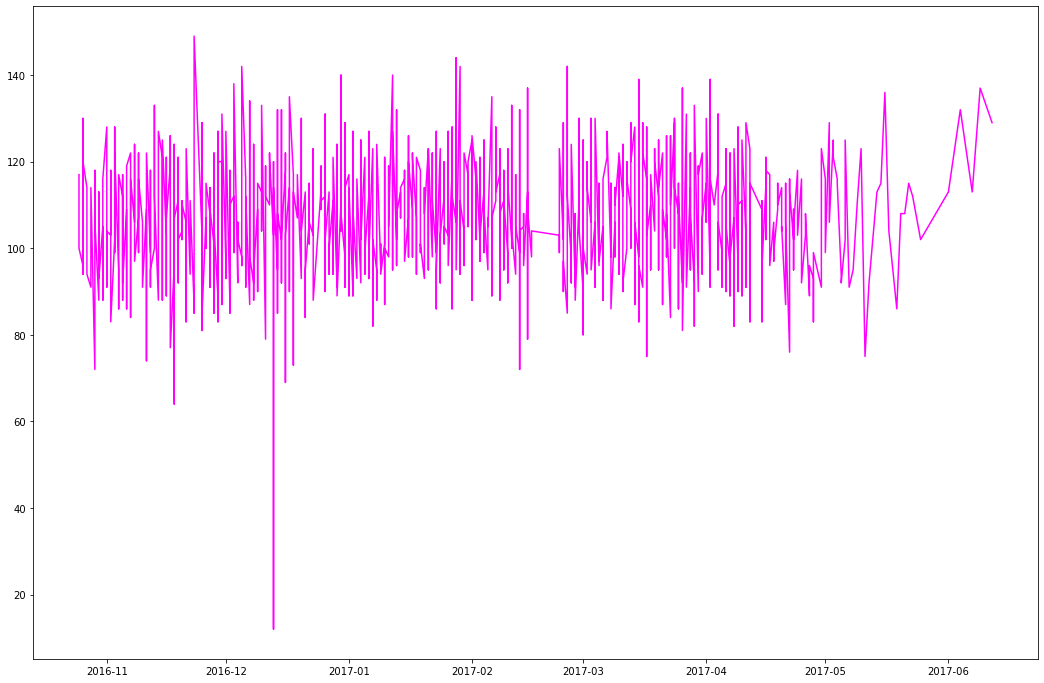

In [11]:
plt.figure(figsize=(18,12))
# plt.plot(nbaDf.index,nbaDf["team1 final score"],color="green")
plt.plot(dfNba.date,dfNba["team2 final score"],color="magenta")
plt.show()

In [12]:
dfNbaScore = dfNba[(dfNba["team1 final score"] > 60) \
    & (dfNba["team2 final score"] > 60)]

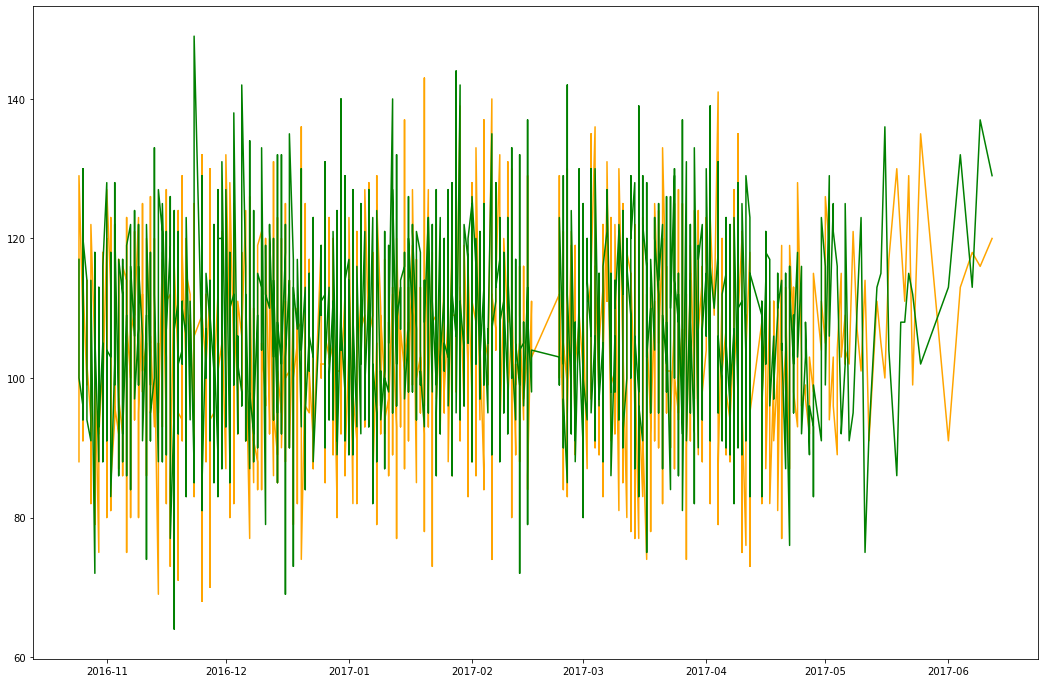

In [13]:
plt.figure(figsize=(18,12))
plt.plot(dfNbaScore.date,dfNbaScore["team1 final score"],color="orange")
plt.plot(dfNbaScore.date,dfNbaScore["team2 final score"],color="green")
plt.show()

### Train, test, & split

#### Target team one game score

In [14]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[features],dfFilterNba["team1 final score"], \
    test_size=0.25,random_state=14)

xTestCopy = xTest.copy(deep=True)

In [15]:
# scale data
scalerX = StandardScaler()
scalerX.fit(xTrain)
xTrainScaled = scalerX.transform(xTrain)
xTestScaled = scalerX.transform(xTest)

In [16]:
XGBRegressor = xgb.XGBRegressor(booster="gbtree",objective="reg:squarederror",learning_rate=0.9111,
    max_depth=6,alpha=1,n_estimators=211,reg_lambda=0.09999,reg_alpha=2.2222)

In [17]:
XGBRegressor.fit(xTrainScaled,yTrain)

XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.9111, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=211, n_jobs=12, num_parallel_tree=1, random_state=0,
             reg_alpha=2.2222, reg_lambda=0.09999, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

In [18]:
yPredict = XGBRegressor.predict(xTestScaled)
pd.DataFrame(yPredict).head(255)

Use subset (sliced data) of np.ndarray is not recommended because it will generate extra copies and increase memory consumption


,0
0,113.069740
1,91.225121
2,101.521202
3,107.979721
4,78.451828
5,103.922203
6,91.464653
7,99.986671
8,111.473396
9,103.162285


In [19]:
xTestCopy.reset_index(inplace=True)
xTestCopy.head(25)

,index,team1 encode,team1 ha encode,team1 open spread,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2 encode,team2 ha encode,team2 open spread,team2 close spread,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,close total
0,876,15,0,1.0,2.0,110,47.62,2.10,1.1000,45,43,0.511,13,0.07,15,-0.11,26,101.03,4,4.45,3.08,6,1.47,6,21.1,31.7,83.1,22.4,10.6,100.3,100.2,103.0,96,99.5,100.8,-0.1,-6.0,-7,2.1,-2.3,26.3,8,1,-1.0,-2.0,-130,56.52,1.77,0.7692,40,42,0.488,11,0.15,9,1.39,4,112.65,28,-5.66,2.81,16,0.84,3,25.3,34.6,87.7,19.1,11.8,111.2,111.7,108.3,111,113.2,110.3,0.5,7.7,6,2.5,-1.4,28.8,215.0,216.5
1,603,22,0,10.5,11.5,550,15.38,6.50,5.5000,29,53,0.354,26,-1.05,29,-6.01,24,102.55,24,-2.97,2.79,27,0.37,5,22.2,33.3,87.0,19.3,9.8,107.6,101.1,100.0,113,100.2,101.9,-6.6,-19.3,4,-3.6,-9.6,26.1,29,1,-10.5,-11.5,-800,88.89,1.12,0.1250,55,38,0.591,5,0.78,6,3.74,29,100.01,1,9.32,2.24,1,1.90,3,20.1,33.7,79.3,19.1,9.1,97.5,100.4,96.7,95,100.8,100.0,2.9,-16.0,-26,4.8,1.1,25.9,194.0,194.5
2,446,16,0,4.5,4.5,165,37.74,2.65,1.6500,41,41,0.500,10,0.25,8,1.53,18,103.88,7,3.24,2.85,25,0.42,5,21.2,33.0,85.8,20.5,10.6,102.1,103.2,113.3,110,106.5,99.9,1.1,4.7,8,4.0,-1.8,27.0,19,1,-4.5,-4.5,-185,64.91,1.54,0.5405,34,48,0.415,19,-0.36,20,-1.52,16,104.77,17,-0.70,2.95,12,0.96,6,22.8,35.1,87.0,18.2,8.6,106.4,104.3,100.0,103,107.6,101.0,-2.1,-10.3,3,0.6,-4.8,26.8,203.0,206.0
3,726,21,0,8.5,9.5,425,19.05,5.25,4.2500,48,39,0.552,12,0.11,13,0.32,14,105.48,15,0.43,3.19,9,1.27,3,20.9,34.2,87.4,21.0,12.2,106.2,106.5,107.7,99,109.7,103.3,0.2,-2.7,-6,5.6,-5.1,25.9,27,1,-8.5,-9.5,-550,84.62,1.18,0.1818,69,29,0.704,3,1.23,3,6.50,10,106.69,2,5.41,2.85,2,1.74,6,23.4,33.5,84.2,18.3,10.5,99.4,105.6,107.7,115,106.3,105.0,6.2,-20.7,-14,7.5,4.9,23.7,210.0,210.0
4,551,19,0,7.0,6.0,220,31.25,3.20,2.2000,34,48,0.415,19,-0.36,20,-1.52,16,104.77,17,-0.70,2.95,12,0.96,6,22.8,35.1,87.0,18.2,8.6,106.4,104.3,100.0,103,107.6,101.0,-2.1,-10.3,3,0.6,-4.8,26.8,2,1,-7.0,-6.0,-260,72.22,1.38,0.3846,62,38,0.620,7,0.61,7,1.89,9,106.81,13,0.67,2.33,15,0.88,1,25.5,32.1,84.9,20.6,9.1,105.9,107.5,104.0,102,109.4,105.6,1.6,-14.3,-33,2.4,0.8,33.6,214.5,212.5
5,280,22,0,-1.0,0.0,-110,52.38,1.91,0.9091,29,53,0.354,26,-1.05,29,-6.01,24,102.55,24,-2.97,2.79,27,0.37,5,22.2,33.3,87.0,19.3,9.8,107.6,101.1,100.0,113,100.2,101.9,-6.6,-19.3,4,-3.6,-9.6,26.1,23,1,1.0,0.0,-110,52.38,1.91,0.9091,28,54,0.341,27,-1.05,27,-5.85,20,103.33,26,-3.59,2.71,28,0.36,1,23.8,33.0,85.3,21.9,9.8,108.1,102.4,102.0,113,102.4,102.5,-5.7,-6.0,-1,-3.6,-7.8,29.8,196.0,198.5
6,168,20,0,3.0,5.0,175,36.

In [20]:
xTestCopy["team1 final score predict"] = ""
for index,row in enumerate(range(0,len(xTestCopy),1)):
    # print(index)
    xTestCopy["team1 final score predict"].iloc[index] = pd.DataFrame(yPredict).iloc[index,0]
    


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [21]:
xTestCopy.tail(50)

,index,team1 encode,team1 ha encode,team1 open spread,team1 close spread,team1 american odds,team1 probability odds,team1 decimal odds,team1 fractional odds,team1 win,team1 loss,team1 record rating,team1 rating rank,team1 rating rating,team1 power rank,team1 power rating,team1 offense rank,team1 offense rating,team1 defense rank,team1 defense rating,team1 home field advantage,team1 schedule rank number,team1 schedule rank decimal,team1 conference encode,team1 assists,team1 defensive rebounds,team1 field goals attempted,team1 fouls,team1 offensive rebounds,team1 opponent points,team1 points,team1 last 3 points,team1 last 1 points,team1 home points,team1 away points,team1 scoring margin,team1 last 3 scoring margin,team1 last 1 scoring margin,team1 home scoring margin,team1 away scoring margin,team1 three pointers attempted,team2 encode,team2 ha encode,team2 open spread,team2 close spread,team2 american odds,team2 probability odds,team2 decimal odds,team2 fractional odds,team2 win,team2 loss,team2 record rating,team2 rating rank,team2 rating rating,team2 power rank,team2 power rating,team2 offense rank,team2 offense rating,team2 defense rank,team2 defense rating,team2 home field advantage,team2 schedule rank number,team2 schedule rank decimal,team2 conference encode,team2 assists,team2 defensive rebounds,team2 field goals attempted,team2 fouls,team2 offensive rebounds,team2 opponent points,team2 points,team2 last 3 points,team2 last 1 points,team2 home points,team2 away points,team2 scoring margin,team2 last 3 scoring margin,team2 last 1 scoring margin,team2 home scoring margin,team2 away scoring margin,team2 three pointers attempted,open total,close total,team1 final score predict
277,625,25,0,5.5,5.5,200,33.33,3.00,2.0000,41,45,0.477,14,-0.07,14,0.19,8,106.97,20,-1.19,3.03,4,1.55,3,20.9,33.6,86.2,21.2,10.1,109.0,107.6,99.0,103,109.8,105.4,-1.3,-20.0,-25,2.2,-4.9,28.0,4,1,-5.5,-5.5,-240,70.59,1.42,0.4167,36,46,0.439,21,-0.45,17,-1.06,17,104.34,16,0.20,2.87,22,0.48,5,23.1,34.8,85.4,16.6,8.8,104.7,104.9,89.7,76,106.6,103.2,0.2,-14.7,-27,3.2,-2.8,28.6,216.5,217.5,87.565811
278,1193,19,0,13.0,17.0,1600,5.88,17.00,16.0000,34,48,0.415,19,-0.36,20,-1.52,16,104.77,17,-0.70,2.95,12,0.96,6,22.8,35.1,87.0,18.2,8.6,106.4,104.3,100.0,103,107.6,101.0,-2.1,-10.3,3,0.6,-4.8,26.8,10,1,-13.0,-17.0,-6000,98.36,1.02,0.0167,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,219.0,216.0,104.730347
279,80,6,0,-13.0,-12.0,-1000,90.91,1.10,0.1000,64,36,0.640,2,1.70,2,8.45,2,114.86,18,-0.82,2.71,5,1.52,2,22.6,34.1,84.6,18.2,9.3,107.4,111.4,123.3,120,113.4,109.4,4.0,2.3,-9,8.2,0.1,33.9,23,1,13.0,12.0,700,12.50,8.00,7.0000,28,54,0.341,27,-1.05,27,-5.85,20,103.33,26,-3.59,2.71,28,0.36,1,23.8,33.0,85.3,21.9,9.8,108.1,102.4,102.0,113,102.4,102.5,-5.7,-6.0,-1,-3.6,-7.8,29.8,204.5,210.0,104.647285
280,35,10,0,-12.0,-11.5,-791,88.78,1.13,0.1264,83,16,0.838,1,3.54,1,15.71,1,119.68,11,1.62,2.99,3,1.58,4,30.0,35.3,87.1,19.7,9.4,104.5,116.5,121.0,129,118.9,114.0,12.0,-2.3,9,16.1,7.7,31.5,24,1,12.0,11.5,570,14.93,6.70,5.7000,24,58,0.293,29,-1.34,28,-6.01,7,107.98,30,-8.40,2.98,13,0.96,4,19.6,33.1,88.5,24.8,11.9,113.3,107.7,116.0,104,109.8,105.8,-5.6,3.0,-25,-2.3,-8.7,22.6,225.0,227.0,115.290405
281,176,3,0,9.0,9.5,400,20.00,5.00,4.0000,20,62,0.244,30,-1.55,30,-6.55,11,106.00,29,-6.95,2.66,23,0.43,1,21.4,35.1,85.2,21.0,8.8,112.5,105.8,95.0,73,104.4,107.1,-6.7,-15.7,-39,-5.5,-7.9,31.6,21,1,-9.0,-9.5,-500,83.33,1.20,0.2000,48,39,0.552,12,0.11,13,0.32,14,105.48,15,0.43,3.19,9,1.27,3,20.9,34.2,87.4,21.0,12.2,106.2,106.5,107.7,99,109.7,103.3,0.2,-2.7,-6,5.6,-5.1,25.9,218.0,216.5,109.722054
282,29,3,0,6.5,8.0,280,26.32,3.80,2.8000,20,62,0.244,30,-1.55,30,-6.55,11,106.00,29,-6.95,2.66,23,0.43,1,21.4,35.1,85.2,21.0,8.8,112.5,105.8,95.0,73,104.4,107.1,-6.7,-15.7,-39,-5.5,-7.9,31.6,17,1,-6.5,-8.0,-360,78.26,1.28,0.2778,44,44,0.500,16,-0.17,16,-0.70,28,100.77,5,4.12,2.73,21,0.53,2,24.0,31.

In [22]:
dfPredict = pd.DataFrame(columns=["yTest","yPredict"])

In [23]:
dfPredict["yTest"] = yTest
dfPredict["yPredict"] = yPredict
dfPredict.head(100)

,yTest,yPredict
876,105,113.069740
603,107,91.225121
446,87,101.521202
726,94,107.979721
551,108,78.451828
280,105,103.922203
168,112,91.464653
1219,86,99.986671
1176,98,111.473396
273,109,103.162285


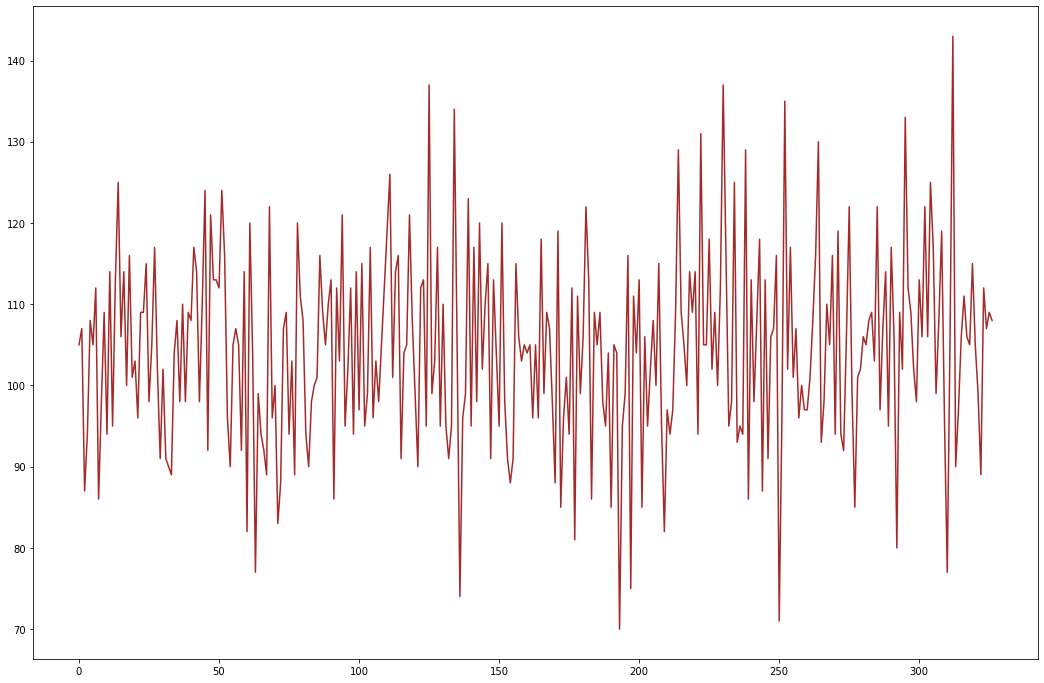

In [24]:
yTestReset = pd.DataFrame(yTest).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset,color="brown")
plt.show()

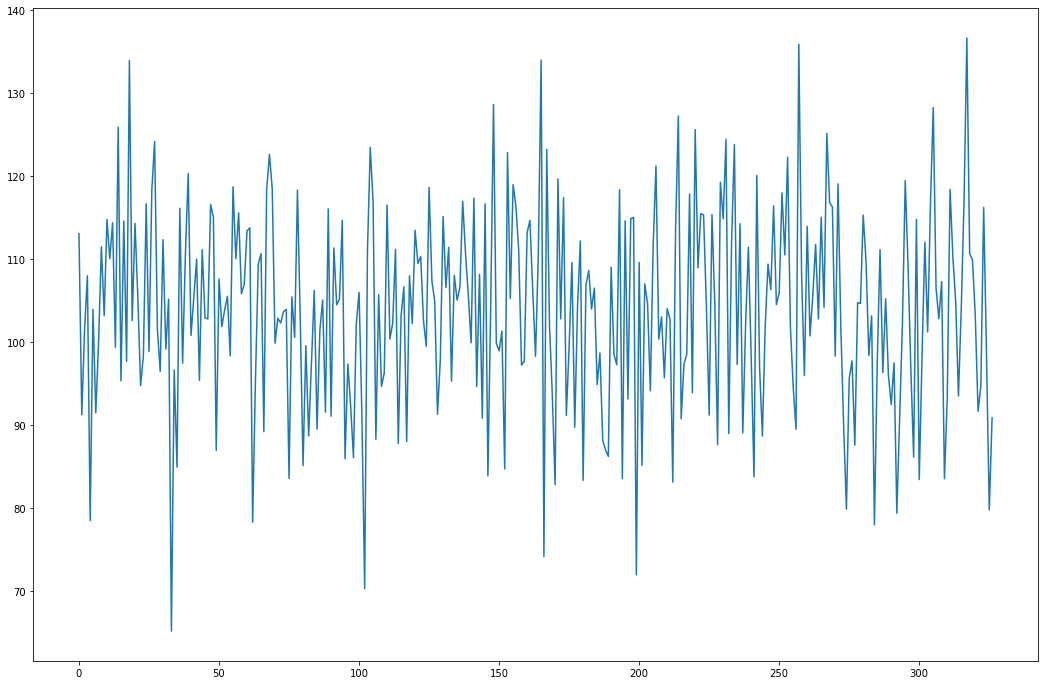

In [25]:
yPredictReset = pd.DataFrame(yPredict).reset_index(inplace=False,drop=True)

plt.figure(figsize=(18,12))
plt.plot(yPredictReset.index,yPredictReset[0])
plt.show()

### Superimpose

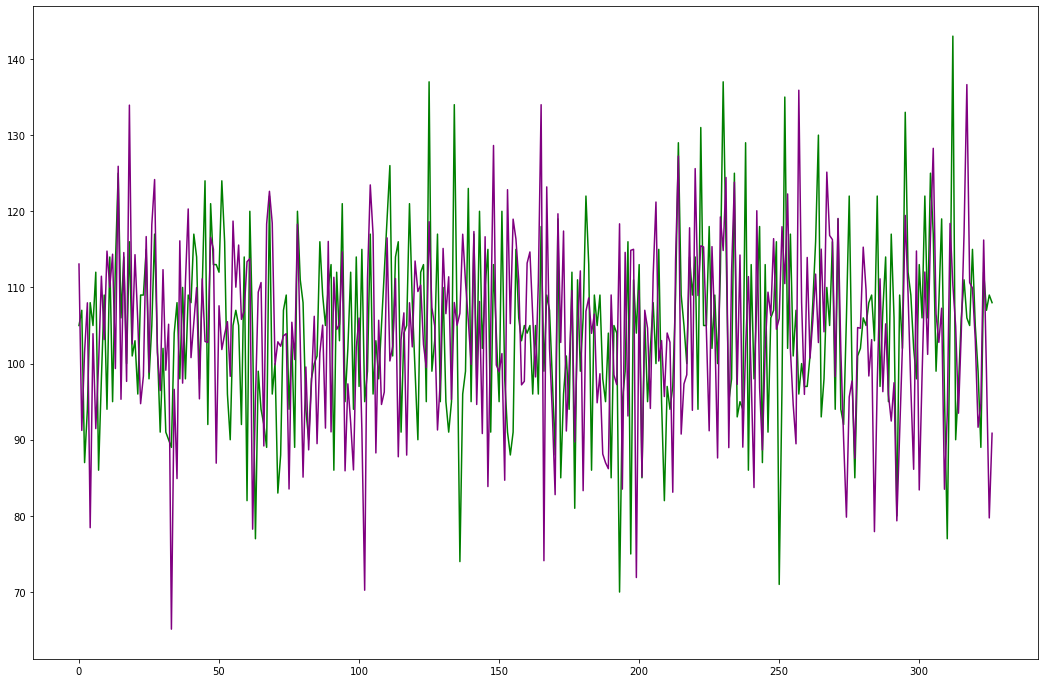

In [26]:
plt.figure(figsize=(18,12))
plt.plot(yTestReset.index,yTestReset["team1 final score"],color="green")
plt.plot(yPredictReset.index,yPredictReset[0],color="purple")
plt.show()

### Percentage off

In [27]:
convNumpyYTestReset = np.array(yTestReset)
percentOff = ((convNumpyYTestReset - yPredictReset) / (convNumpyYTestReset + 0.0001)) * 100

pd.DataFrame(percentOff).sample(55)

,0
268,-11.261935
70,0.151939
252,18.149305
57,-10.062820
158,5.624355
152,13.590258
113,2.487073
74,4.652247
176,2.162911
65,-17.706467


In [28]:
meanAbsoluteError = mean_absolute_error(yTest,yPredict)
print("mean absolute error (team1 final score): %s" % meanAbsoluteError)
meanSquaredError = mean_squared_error(yTest,yPredict)
print("mean squared error (team1 final score): %s" % meanSquaredError)

mean absolute error (team1 final score): 11.648719507619875
mean squared error (team1 final score): 211.10418270213765


### Convert to dmatrix data structure

In [29]:
dataDMatrix = xgb.DMatrix(data=dfFilterNba[features],label=dfFilterNba["team1 final score"])
dataDMatrix

In [30]:
params = {"booster": "gbtree","objective":"reg:squarederror","learning_rate": 0.9111,
    'max_depth': 6,"alpha": 1,"n_estimators": 211,"reg_lambda": 0.09999,"reg_alpha": 2.2222}

In [31]:
crossValResults = xgb.cv(dtrain=dataDMatrix,params=params,nfold=12,
    num_boost_round=25,early_stopping_rounds=10,metrics="rmse",as_pandas=True,seed=122)
crossValResults.head()

[12:50:05] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:50:05] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:50:05] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


,train-rmse-mean,train-rmse-std,test-rmse-mean,test-rmse-std
0,14.185637,0.062721,14.687560,0.420563
1,9.601524,0.142589,12.090464,0.707633


In [32]:
dtrain = xgb.DMatrix(xTrain[features],label=yTrain)
dtest = xgb.DMatrix(xTest[features],label=yTest)

In [33]:
parameter = {'max_depth': 6,'eta': 0.3333,"booster": "gbtree","verbose": True,"n_estimators": 122,"learning_rate": 0.9111,
    "objective": "reg:squarederror","alpha": 10,"reg_alpha":2.2222}
parameter["nthread"] = 4
parameter['eval_metric'] = ["auc","logloss","ams@0"]

evallist = [(dtest,"eval"),(dtrain,"train")]

In [34]:
num_round = 17
bst = xgb.train(parameter,dtrain,num_round,evallist)

[12:50:07] WARNING: ..\src\learner.cc:573: 
Parameters: { "n_estimators", "verbose" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[12:50:07] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[12:50:07] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[0]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:30.76110	train-auc:nan	train-logloss:-3794.32080	train-ams@0:61.56797
[12:50:07] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[12:50:07] WARNING: ..\src\metric\auc.cc:303: Dataset contains only positive or negative samples.
[1]	eval-auc:nan	eval-logloss:-3807.39185	eval-ams@0:41.34926	train-auc:nan	train-logloss:-3794.32080	train-ams@0:84.10741
[12:50:07] WARNIN

In [35]:
yPredict1 = bst.predict(dtest,ntree_limit=bst.best_ntree_limit)
pd.DataFrame(yPredict1).head(50)

ntree_limit is deprecated, use `iteration_range` or model slicing instead.


,0
0,109.131462
1,85.862862
2,106.563248
3,100.199875
4,100.666130
5,91.512207
6,106.700958
7,103.451134
8,107.954895
9,104.874123


### Feature importance

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

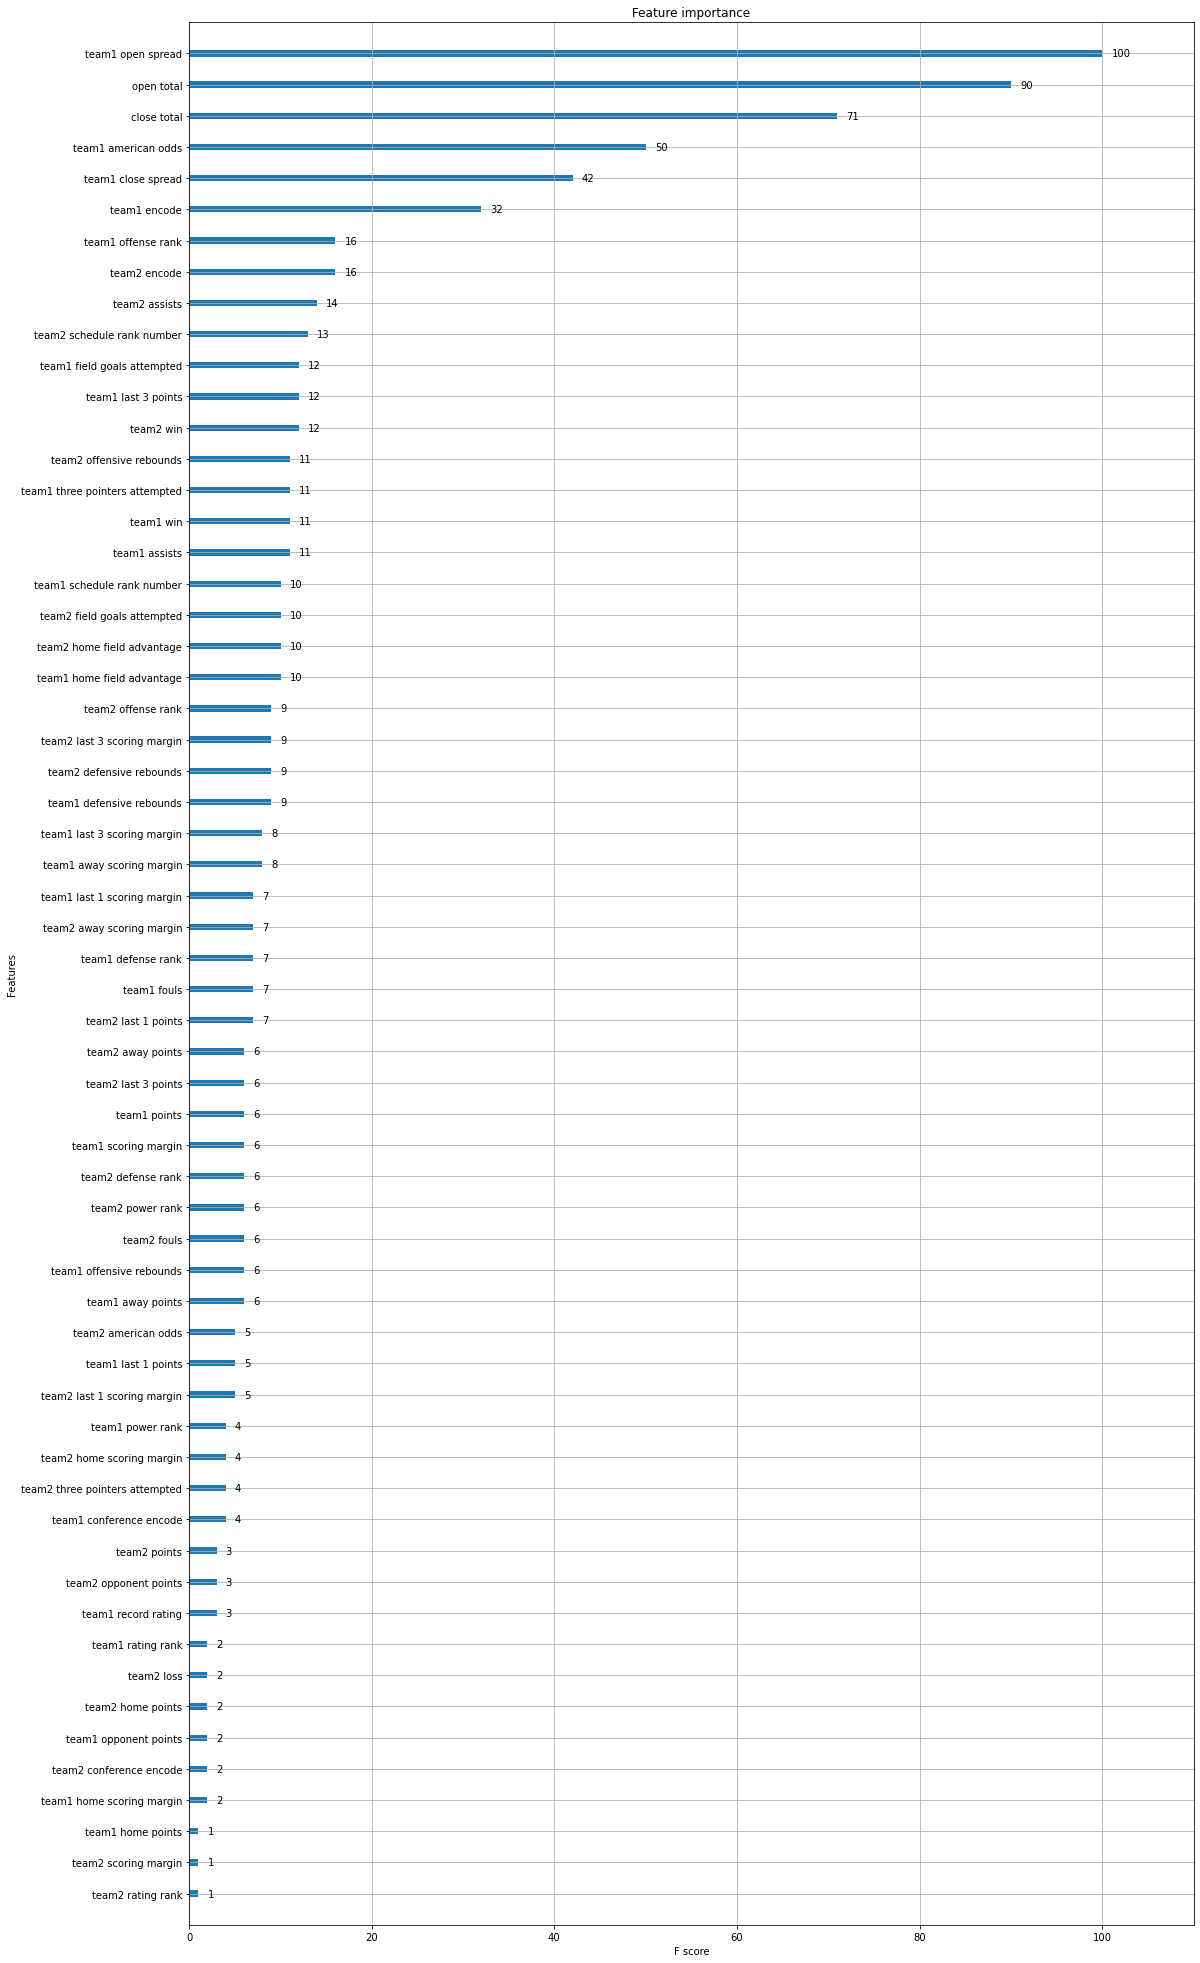

In [36]:
fig,ax = plt.subplots(1,1,figsize=(18,35))
xgb.plot_importance(bst,ax=ax)

### SHAP (shapley additive explanations)

In [37]:
treeExplainer = shap.TreeExplainer(XGBRegressor,model_output="raw",feature_perturbation="interventional",
    data=pd.DataFrame(xTest).head(100),algorithm="deep")

In [38]:
shapValues = treeExplainer.shap_values(pd.DataFrame(xTest).iloc[:327,:])
shapValues

array([[-0.16247024,  0.        ,  1.76541426, ...,  0.        ,
         0.        , -0.12475397],
       [-0.32073763,  0.        , -0.12996026, ...,  0.        ,
         0.        , -0.18361965],
       [-0.21700302,  0.        ,  5.00562763, ...,  0.        ,
         0.        , -0.19618703],
       ...,
       [-0.32073763,  0.        ,  1.28146664, ...,  0.        ,
         0.        , -0.18819076],
       [-0.34148455,  0.        , -3.3048528 , ...,  0.        ,
         0.        , -0.2985625 ],
       [-0.32073763,  0.        ,  1.11607351, ...,  0.        ,
         0.        , -0.18819076]])

In [39]:
shapValuesList = []
for i in shapValues:
    convListShapValues = i.tolist()
    shapValuesList.append(convListShapValues)
    
dfShapValues = pd.DataFrame(shapValuesList)
dfShapValues.head(55)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81
0,-0.162470,0.0,1.765414,5.385671,1.256695,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.109908,0.750711,-0.164509,0.775148,-0.807171,0.0,0.0,0.0,0.0,0.0,-1.794871,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.052429,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.232506,2.806974,0.011026,0.025301,0.002008,0.0,0.0,-0.124754
1,-0.320738,0.0,-0.129960,6.404277,-0.642498,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.125779,1.381488,0.578420,-2.322133,-0.612249,0.0,0.0,0.0,0.0,0.0,-0.398394,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,-3.684274,0.0,0.0,0.435125,0.0,0.000984,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069180,-0.858725,0.083455,0.057998,0.028682,0.0,0.0,-0.183620
2,-0.217003,0.0,5.005628,5.854305,1.422674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.053010,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.185568,-6.649286,0.576008,0.819032,-0.666880,0.0,0.0,0.0,0.0,0.0,-1.805294,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.170485,0.0,0.276249,0.0,0.0,-0.050148,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.012655,-1.369215,-0.056353,0.027394,-0.006811,0.0,0.0,-0.196187
3,-0.320738,0.0,1.323167,6.429019,1.634926,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.181310,1.380720,-0.166130,0.812164,-0.638123,0.0,0.0,0.0,0.0,0.0,-1.770536,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.052429,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.064923,-0.768164,0.066260,0.056503,0.028682,0.0,0.0,-0.186254
4,-0.320595,0.0,1.377087,6.392461,1.673135,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.133407,1.395755,0.601168,0.810736,-0.638123,0.0,0.0,0.0,0.0,0.0,-1.770206,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276471,0.0,0.0,-0.050148,0.0,-0.000153,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069180,-0.770959,0.072009,0.055264,-0.012853,0.0,0.0,-0.188191
5,-0.341485,0.0,-3.692000,-6.310252,3.676854,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,-0.022011,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.040165,3.200778,0.338683,2.929505,-0.669440,0.0,0.0,0.0,0.0,0.0,0.223234,0.0,0.0,0.0,0.0,0.0,-0.000410,0.0,0.0,0.0,0.0,0.264000,0.0,0.109176,0.0,0.0,-0.075996,0.0,-0.000525,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.131253,-1.194175,-0.079605,-0.348686,0.007212,0.0,0.0,-0.243814
6,-0.320738,0.0,0.510921,6.430787,-0.406434,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.125779,1.395755,0.601168,-2.103811,-0.612249,0.0,0.0,0.0,0.0,0.0,-0.383169,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.034554,0.0,0.000143,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.069180,-0.858725,0.083455,0.057358,0.002008,0.0,0.0,-0.188191
7,7.572211,0.0,0.602458,6.828500,1.780169,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.100501,1.394779,-0.166130,0.810736,-0.666880,0.0,0.0,0.0,0.0,0.0,-1.770536,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.135569,0.0,0.276318,0.0,0.0,-0.052429,0.0,0.000929,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.009550,-0.536399,0.719788,0.055264,0.002008,0.0,0.0,-0.188191
8,-0.320738,0.0,1.059084,6.890741,1.552199,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0

In [40]:
shap.initjs()

In [41]:
shap.force_plot(treeExplainer.expected_value,shapValues[4],pd.DataFrame(xTest).iloc[5:6,])


In [42]:
shap.force_plot(treeExplainer.expected_value,shapValues[27],pd.DataFrame(xTest).iloc[28:29,])


In [43]:
shap.force_plot(treeExplainer.expected_value,shapValues[55],pd.DataFrame(xTest).iloc[56:57])


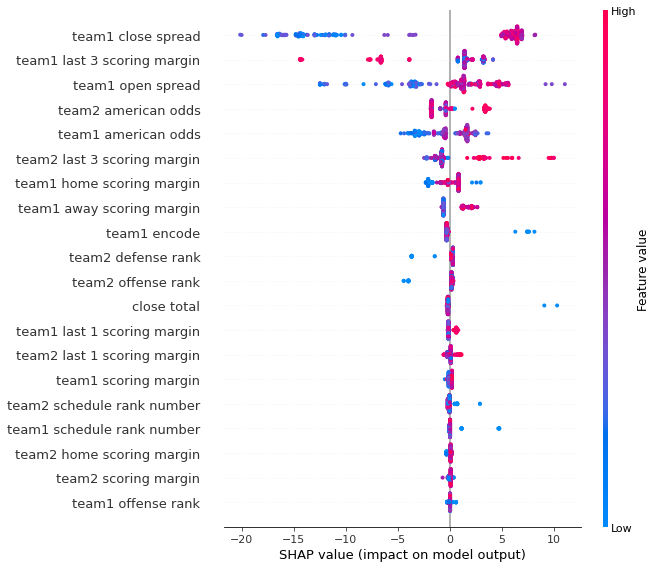

In [44]:
shap.summary_plot(shapValues,xTest[0:327])

### Compute SHAP values

In [45]:
explainer = shap.Explainer(XGBRegressor.predict,xTrain[:100])
explainShapValues = explainer(xTrain[:50])

Permutation explainer: 51it [00:14,  1.35it/s]                                                                         


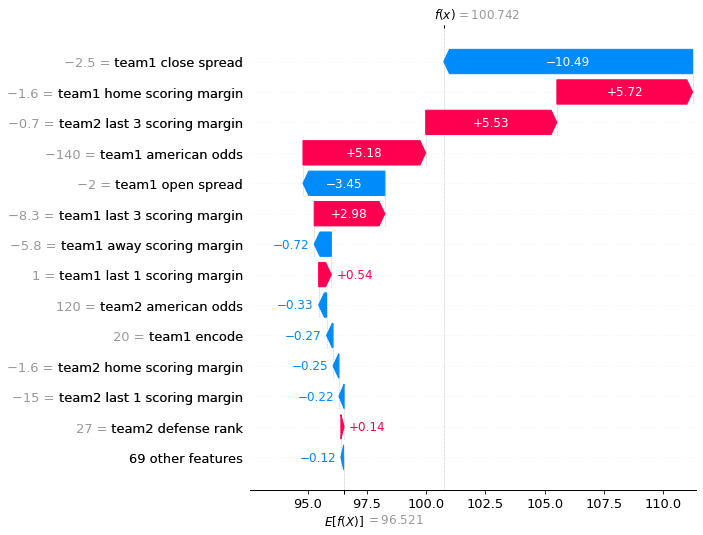

In [46]:
# the waterfall_plot shows how we get from shap_values.base_values to model.predict(X)[sample_ind]
shap.plots.waterfall(explainShapValues[13],max_display=14)

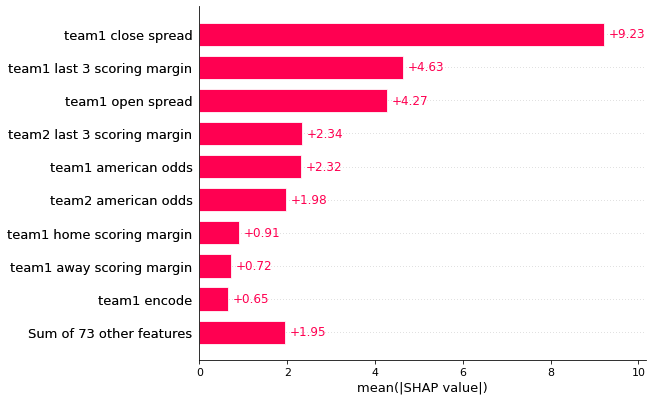

In [47]:
shap.plots.bar(explainShapValues)

### Statsmodels

In [110]:
feat = [
    # 'date',
    # 'team1',
    'team1 encode',
    # 'team1 ha',
    'team1 ha encode',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    'team1 open spread',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 rating rating',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 offense rating',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 last 1 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    'team1 three pointers attempted',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    'team2 ha encode',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    'team2 open spread',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 defense rating',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 home scoring margin',
    'team2 away scoring margin',
    'team2 three pointers attempted',
    'open total',
    # 'open total result',
    # 'open total result encode',
    'close total']
    # 'close total result',
    # 'close total result encode',
    # 'year'

dropFeat = [
    # 'date',
    # 'team1',
    # 'team1 ha',
    # 'team1 1st quarter',
    # 'team1 2nd quarter',
    # 'team1 3rd quarter',
    # 'team1 4th quarter',
    # 'team1 final score',
    # 'team1 game result',
    # 'team1 game result encode',
    # 'team1 open spread result',
    # 'team1 open spread result encode',
    'team1 close spread',
    # 'team1 close spread result',
    # 'team1 close spread result encode',
    'team1 american odds',
    'team1 probability odds',
    'team1 decimal odds',
    'team1 fractional odds',
    'team1 win',
    'team1 loss',
    'team1 record rating',
    'team1 rating rank',
    'team1 power rank',
    'team1 power rating',
    'team1 offense rank',
    'team1 defense rank',
    'team1 defense rating',
    'team1 home field advantage',
    'team1 schedule rank number',
    'team1 schedule rank decimal',
    # 'team1 conference',
    'team1 conference encode',
    'team1 assists',
    'team1 defensive rebounds',
    'team1 field goals attempted',
    'team1 fouls',
    'team1 offensive rebounds',
    'team1 opponent points',
    'team1 points',
    'team1 last 3 points',
    'team1 home points',
    'team1 away points',
    'team1 scoring margin',
    'team1 last 3 scoring margin',
    'team1 last 1 scoring margin',
    'team1 home scoring margin',
    'team1 away scoring margin',
    # 'team2',
    'team2 encode',
    # 'team2 ha',
    'team2 ha encode',
    # 'team2 1st quarter',
    # 'team2 2nd quarter',
    # 'team2 3rd quarter',
    # 'team2 4th quarter',
    # 'team2 final score',
    # 'team2 game result',
    # 'team2 game result encode',
    'team2 open spread',
    # 'team2 open spread result',
    # 'team2 open spread result encode',
    'team2 close spread',
    # 'team2 close spread result',
    # 'team2 close spread result encode',
    'team2 american odds',
    'team2 probability odds',
    'team2 decimal odds',
    'team2 fractional odds',
    'team2 win',
    'team2 loss',
    'team2 record rating',
    'team2 rating rank',
    'team2 rating rating',
    'team2 power rank',
    'team2 power rating',
    'team2 offense rank',
    'team2 offense rating',
    'team2 defense rank',
    'team2 home field advantage',
    'team2 schedule rank number',
    'team2 schedule rank decimal',
    # 'team2 conference',
    'team2 conference encode',
    'team2 assists',
    'team2 defensive rebounds',
    'team2 field goals attempted',
    'team2 fouls',
    'team2 offensive rebounds',
    'team2 opponent points',
    'team2 points',
    'team2 last 3 points',
    'team2 last 1 points',
    'team2 home points',
    'team2 away points',
    'team2 scoring margin',
    'team2 last 3 scoring margin',
    'team2 last 1 scoring margin',
    'team2 away scoring margin',
    'open total',
    'close total']


In [101]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[feat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [102]:
xInclCons = sm.add_constant(xTrain)
# ordinary least squares
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))          
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.208
Method:                 Least Squares   F-statistic:                     4.667
Date:                Thu, 13 May 2021   Prob (F-statistic):           1.95e-28
Time:                        13:12:33   Log-Likelihood:                -3696.1
No. Observations:                 980   AIC:                             7534.
Df Residuals:                     909   BIC:                             7881.
Df Model:                          70                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
team1 encode                      -0.0062      0.170     -0.037      0.971      -0.341       0.328
team1 ha encode                 4.026e-10   6.33e-10      0.636      0.525    -8.4e-10    1.65e-09
team1 open spread                 -0.0157      0.129     -0.122      0.903      -0.268       0.237
team1 close spread                -0.1096      0.134     -0.819      0.413      -0.372       0.153
team1 american odds               -0.0061      0.007     -0.850      0.396      -0.020       0.008
team1 probability odds             0.5934      0.704      0.843      0.399      -0.788       1.974
team1 decimal odds              -258.5241    204.979     -1.261      0.208    -660.812     143.764
team1 fractional odds            259.5266    205.036      1.266      0.206    -142.872     661.925
team1 win                          0.2265      0.691      0.328      0.743      -1.130       1.583
team1 loss                         1.1531      1.455      0.793      0.428      -1.702       4.008
team1 record rating               -2.8630     25.669     -0.112      0.911     -53.241      47.515
team1 rating rank                  0.0252      0.637      0.040      0.968      -1.224       1.275
team1 rating rating               -0.5770     10.840     -0.053      0.958     -21.851      20.697
team1 power rank                  -0.5031      0.989     -0.509      0.611      -2.444       1.437
team1 power rating                -0.7412      3.457     -0.214      0.830      -7.526       6.044
team1 offense rank                 0.3009      0.400      0.752      0.452      -0.484       1.086
team1 offense rating              -1.4287      5.059     -0.282      0.778     -11.358       8.501
team1 defense rank                -0.3579      0.842     -0.425      0.671      -2.011       1.295
team1 defense rating              -1.1255      5.159     -0.218      0.827     -11.251       9.000
team1 home field advantage        -3.3475      5.290     -0.633      0.527     -13.729       7.034
team1 schedule rank number         1.1576      1.825      0.634      0.526      -2.424       4.740
team1 schedule rank decimal       23.6789     38.405      0.617      0.538     -51.694      99.052
team1 conference encode            0.5490      1.068      0.514      0.607      -1.546       2.644
team1 assists                      0.8511      1.448      0.588      0.557      -1.991       3.693
team1 defensive rebounds           1.1167      2.167      0.515      0.607      -3.137       5.371
team1 field goals attempted        0.2205      1.111      0.199      0.843      -1.959       2.400
team1 offensive rebounds          -0.6794      1.893     -0.359      0.720      -4.394       3.036
team1 opponent points             15.4193     26.694      0.578      0.564     -36.969      67.808
team1 points  

In [103]:
pValues = pd.DataFrame({'coefficient': results.params,'p_value': round(results.pvalues,4)})
pValues

,coefficient,p_value
team1 encode,-6.219192e-03,0.9709
team1 ha encode,4.026371e-10,0.5251
team1 open spread,-1.566596e-02,0.9031
team1 close spread,-1.096191e-01,0.4131
team1 american odds,-6.110944e-03,0.3958
team1 probability odds,5.933646e-01,0.3993
team1 decimal odds,-2.585241e+02,0.2076
team1 fractional odds,2.595266e+02,0.2059
team1 win,2.264998e-01,0.7432
team1 loss,1.153102e+00,0.4281


In [104]:
pValueSeries = pValues.p_value
pd.DataFrame(pValueSeries).head(70)

,p_value
team1 encode,0.9709
team1 ha encode,0.5251
team1 open spread,0.9031
team1 close spread,0.4131
team1 american odds,0.3958
team1 probability odds,0.3993
team1 decimal odds,0.2076
team1 fractional odds,0.2059
team1 win,0.7432
team1 loss,0.4281


### Features improvement

In [111]:
xTrain,xTest,yTrain,yTest = train_test_split(dfFilterNba[dropFeat],dfFilterNba["team1 final score"],test_size=0.25,\
    random_state=11)

In [112]:
xInclCons = sm.add_constant(xTrain)
model = sm.OLS(yTrain.astype(float),xInclCons.astype(float))   # ordinary least square
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      team1 final score   R-squared:                       0.264
Model:                            OLS   Adj. R-squared:                  0.209
Method:                 Least Squares   F-statistic:                     4.740
Date:                Thu, 13 May 2021   Prob (F-statistic):           8.94e-29
Time:                        13:14:31   Log-Likelihood:                -3696.1
No. Observations:                 980   AIC:                             7532.
Df Residuals:                     910   BIC:                             7874.
Df Model:                          69                                         
Covariance Type:            nonrobust                                         
===============================================================================================
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
team1 close spread             -0.1088      0.134     -0.814      0.416      -0.371       0.153
team1 american odds            -0.0061      0.007     -0.850      0.396      -0.020       0.008
team1 probability odds          0.5978      0.702      0.851      0.395      -0.780       1.976
team1 decimal odds           -257.6187    204.712     -1.258      0.209    -659.381     144.144
team1 fractional odds         258.6148    204.766      1.263      0.207    -143.254     660.484
team1 win                       0.1996      1.205      0.166      0.868      -2.165       2.564
team1 loss                      1.3677      2.836      0.482      0.630      -4.199       6.934
team1 record rating            15.1422    240.626      0.063      0.950    -457.105     487.389
team1 rating rank               0.1094      0.544      0.201      0.841      -0.958       1.177
team1 power rank               -0.5469      0.572     -0.956      0.339      -1.670       0.576
team1 power rating             -2.2407      3.823     -0.586      0.558      -9.744       5.262
team1 offense rank              0.2961      0.518      0.572      0.567      -0.720       1.312
team1 defense rank             -0.3457      0.686     -0.504      0.615      -1.692       1.001
team1 defense rating            0.3714      2.940      0.126      0.899      -5.398       6.141
team1 home field advantage     -3.4233      6.295     -0.544      0.587     -15.779       8.932
team1 schedule rank number      1.0567      1.432      0.738      0.461      -1.753       3.866
team1 schedule rank decimal    21.4835     29.897      0.719      0.473     -37.192      80.159
team1 conference encode         0.6308      0.827      0.762      0.446      -0.993       2.255
team1 assists                   0.8159      1.235      0.661      0.509      -1.607       3.239
team1 defensive rebounds        1.3254      1.426      0.929      0.353      -1.474       4.125
team1 field goals attempted     0.0722      0.720      0.100      0.920      -1.340       1.484
team1 fouls                     0.0006      0.514      0.001      0.999      -1.008       1.009
team1 offensive rebounds       -0.3903      0.937     -0.416      0.677      -2.230       1.449
team1 opponent points          16.0230     57.670      0.278      0.781     -97.159     129.205
team1 points                   -7.1412     17.923     -0.398      0.690     -42.317      28.035
team1 last 3 points             0.2215      0.279      0.793      0.428      -0.326       0.769
team1 home points              -4.0040     28.771     -0.139      0.889     -60.468      52.460
team1 away points              -2.5665     28.218     -0.091      0.928     -57.947      52.814
team1 scoring margin           30.5360     31.366      0.974      0.331     -31.022      92.094
team1 last 

In [113]:
pValues = pd.DataFrame({'coef': results.params,'pvalue': round(results.pvalues,4)})
pValues

,coef,pvalue
team1 close spread,-0.108806,0.4156
team1 american odds,-0.006110,0.3956
team1 probability odds,0.597845,0.3947
team1 decimal odds,-257.618659,0.2086
team1 fractional odds,258.614801,0.2069
team1 win,0.199643,0.8684
team1 loss,1.367723,0.6298
team1 record rating,15.142232,0.9498
team1 rating rank,0.109409,0.8407
team1 power rank,-0.546921,0.3394
